In [ ]:
!python -V

Python 3.10.12


In [ ]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.feature_extraction import DictVectorizer # encode categorical columns and make them numeric (ohe)
from sklearn.linear_model import LinearRegression  # this is your ALGORITHM
from sklearn.linear_model import Lasso  # another ALGORITHM
from sklearn.linear_model import Ridge  # a third ALGORITHM

from sklearn.metrics import mean_squared_error  # ERROR

In [ ]:
# https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
# https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fwww.nyc.gov%2Fassets%2Ftlc%2Fdownloads%2Fpdf%2Fdata_dictionary_trip_records_green.pdf

In [ ]:
df = pd.read_parquet('https://github.com/fenago/datasets/raw/main/green_tripdata_2024-01.parquet')
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.8,1.0,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.3,1.0,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.0,74,262,1.0,3.08,19.8,1.0,0.5,3.00,0.0,NaN,1.0,28.05,1.0,1.0,2.75
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.0,74,116,1.0,2.40,14.2,1.0,1.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.0,74,243,1.0,5.14,22.6,1.0,0.5,6.28,0.0,NaN,1.0,31.38,1.0,1.0,0.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56551 entries, 0 to 56550
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               56551 non-null  int32         
 1   lpep_pickup_datetime   56551 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  56551 non-null  datetime64[ns]
 3   store_and_fwd_flag     53136 non-null  object        
 4   RatecodeID             53136 non-null  float64       
 5   PULocationID           56551 non-null  int32         
 6   DOLocationID           56551 non-null  int32         
 7   passenger_count        53136 non-null  float64       
 8   trip_distance          56551 non-null  float64       
 9   fare_amount            56551 non-null  float64       
 10  extra                  56551 non-null  float64       
 11  mta_tax                56551 non-null  float64       
 12  tip_amount             56551 non-null  float64       
 13  t

In [ ]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,56551.000000,53136.000000,56551.000000,56551.000000,53136.000000,56551.000000,56551.000000,56551.000000,56551.000000,56551.000000,56551.000000,0.0,56551.000000,56551.000000,53136.000000,53133.000000,53136.000000
mean,1.870241,1.151611,96.077594,140.499850,1.309169,31.491124,16.929275,0.900947,0.576696,2.256510,0.191202,NaN,0.984902,22.403186,1.323114,1.032673,0.777138
std,0.336041,1.045251,57.862401,76.556276,0.978252,1417.460382,15.356032,1.344313,0.381998,2.847957,1.190748,NaN,0.139863,16.956518,0.499731,0.177780,1.238011
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-5.000000,-0.500000,-1.660000,0.000000,NaN,-1.000000,-76.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.100000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,13.440000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,140.000000,1.000000,1.790000,13.500000,0.000000,0.500000,2.000000,0.000000,NaN,1.000000,18.420000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,112.000000,225.000000,1.000000,3.080000,19.800000,2.500000,0.500000,3.500000,0.000000,NaN,1.000000,26.600000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,201421.680000,1422.600000,10.250000,4.250000,110.000000,24.050000,NaN,1.000000,1424.100000,5.000000,2.000000,2.750000


In [ ]:
df[df.trip_type==2]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
36,2,2024-01-01 00:15:43,2024-01-01 00:15:51,N,5.0,61,61,2.0,0.00,22.00,0.0,0.0,0.00,0.00,NaN,1.0,23.00,2.0,2.0,0.00
45,2,2024-01-01 00:34:56,2024-01-01 00:34:57,N,5.0,66,264,2.0,0.00,50.00,0.0,0.0,10.20,0.00,NaN,1.0,61.20,1.0,2.0,0.00
56,2,2024-01-01 00:52:23,2024-01-01 01:07:39,N,5.0,74,127,1.0,5.76,25.55,0.0,0.0,0.00,0.00,NaN,1.0,26.55,2.0,2.0,0.00
58,2,2024-01-01 00:55:10,2024-01-01 01:22:19,N,5.0,189,91,2.0,5.04,30.99,0.0,0.0,6.40,0.00,NaN,1.0,38.39,1.0,2.0,0.00
59,2,2024-01-01 00:56:37,2024-01-01 00:56:42,N,5.0,173,173,1.0,0.00,15.00,0.0,0.0,0.00,0.00,NaN,1.0,16.00,1.0,2.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53099,2,2024-01-31 22:10:36,2024-01-31 22:16:46,N,5.0,42,74,1.0,1.03,8.00,0.0,0.0,0.00,0.00,NaN,1.0,9.00,2.0,2.0,0.00
53110,2,2024-01-31 23:19:51,2024-01-31 23:52:04,N,5.0,25,162,2.0,8.32,40.00,0.0,0.0,2.00,6.94,NaN,1.0,52.69,1.0,2.0,2.75
53123,2,2024-01-31 23:57:29,2024-02-01 00:24:07,N,5.0,181,100,2.0,6.16,60.00,0.0,0.0,12.75,0.00,NaN,1.0,76.50,1.0,2.0,2.75
53133,2,2024-01-31 23:19:14,2024-01-31 23:19:27,N,5.0,181,181,2.0,0.00,74.00,0.0,0.0,10.00,0.00,NaN,1.0,85.00,1.0,2.0,0.00


In [ ]:
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

df = df[(df.duration >= 1) & (df.duration <= 60)]

In [ ]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.8,...,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75,11.500000
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.3,...,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75,20.866667
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.0,74,262,1.0,3.08,19.8,...,0.5,3.00,0.0,NaN,1.0,28.05,1.0,1.0,2.75,19.033333
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.0,74,116,1.0,2.40,14.2,...,1.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00,11.866667
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.0,74,243,1.0,5.14,22.6,...,0.5,6.28,0.0,NaN,1.0,31.38,1.0,1.0,0.00,10.983333


In [ ]:

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

In [ ]:
df.describe()

,VendorID,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
count,54373.000000,51062.000000,51062.000000,54373.000000,54373.000000,54373.000000,54373.000000,54373.000000,54373.000000,0.0,54373.000000,54373.000000,51062.000000,51061.000000,51062.000000,54373.000000
mean,1.870230,1.082566,1.310446,28.974730,16.427333,0.920857,0.586435,2.275914,0.183207,NaN,0.989833,21.967973,1.310916,1.017489,0.802622,13.778175
std,0.336054,0.704490,0.983071,1355.349789,11.430829,1.348620,0.372435,2.706103,1.154749,NaN,0.105226,13.426996,0.481292,0.131085,1.249876,9.021503
min,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-1.660000,0.000000,NaN,-1.000000,-71.000000,1.000000,1.000000,-2.750000,1.000000
25%,2.000000,1.000000,1.000000,1.150000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,13.600000,1.000000,1.000000,0.000000,7.583333
50%,2.000000,1.000000,1.000000,1.820000,13.500000,0.000000,0.500000,2.000000,0.000000,NaN,1.000000,18.450000,1.000000,1.000000,0.000000,11.566667
75%,2.000000,1.000000,1.000000,3.100000,19.590000,2.500000,0.500000,3.550000,0.000000,NaN,1.000000,26.400000,2.000000,1.000000,2.750000,17.300000
max,2.000000,99.000000,8.000000,201421.680000,400.000000,10.250000,4.250000,88.000000,22.320000,NaN,1.000000,401.500000,5.000000,2.000000,2.750000,60.000000


In [ ]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)  # All of my features in a sparse matrix (0's and 1's)

target = 'duration'   # this is my y value... what I'm trying to predict
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

7.127055553456886

<ipython-input-41-5fdabbf3bec2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
<ipython-input-41-5fdabbf3bec2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


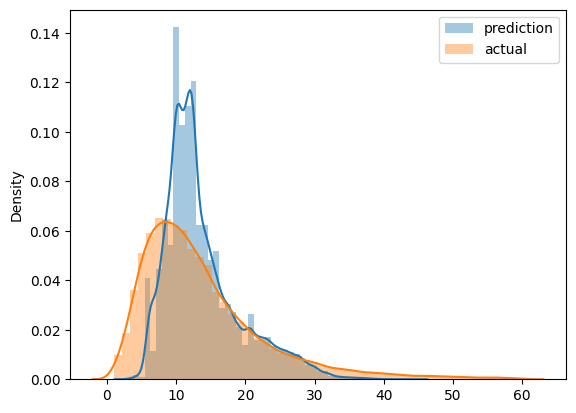

In [ ]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [ ]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)

    return df

In [ ]:
df_train = read_dataframe('https://github.com/fenago/datasets/raw/main/green_tripdata_2024-01.parquet')
df_val = read_dataframe('https://github.com/fenago/datasets/raw/main/green_tripdata_2023-12.parquet')

In [ ]:
len(df_train), len(df_val)

(54373, 61119)

In [ ]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [ ]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [ ]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

6.6906436231457125

In [ ]:
import pickle

# Assuming `dv` (DictVectorizer) and `lr` (Linear Regression model) are defined in your notebook
with open('/content/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)


In [ ]:
lasso = Lasso(.001)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.374081577822693

In [ ]:
?lr

In [ ]:
?lasso